In [ ]:
#1
"""Напишите функцию, которая:
1) Принимает вложенный список смешанных типов (числа, строки, списки)
2) Находит сумму всех чисел на всех уровнях вложенности
3) Игнорирует строки и другие нечисловые типы
4) Обрабатывает вложенные словари (суммирует значения-числа)

Используйте рекурсию """

In [13]:
def func(data):
    res = 0
    
    for el in data:
        match el:
            case list():
                res += func(el)
            case int():
                res += el

    return res


print(func([[1, 2, 3], [1, 2], 1, ["op"], 'uuu']))



10


In [ ]:
#2
"""Напишите рекурсивную функцию number_partitions(n), которая находит все способы разбить натуральное число n на сумму натуральных слагаемых.

Правила разбиения:
1) Слагаемые должны идти в порядке невозрастания (каждое следующее ≤ предыдущему)
2) Нужно найти все возможные комбинации
3) Использовать рекурсию
4) Подсказки для рекурсии:

Подумайте о базовом случае: что должно вернуться, когда число для разбиения равно 0?
Рекурсивный шаг: если вы берете первое слагаемое x, то оставшуюся часть n - x нужно разбить рекурсивно
Ограничение: следующее слагаемое не должно быть больше предыдущего
Можно использовать вспомогательный параметр для отслеживания максимального допустимого слагаемого

# Число 3 можно разбить тремя способами:
# 3 = 3
# 3 = 2 + 1  
# 3 = 1 + 1 + 1
Пример для проверки кода
number_partitions(1) → [[1]]
number_partitions(2) → [[2], [1, 1]]
number_partitions(3) → [[3], [2, 1], [1, 1, 1]]
number_partitions(4) → [[4], [3, 1], [2, 2], [2, 1, 1], [1, 1, 1, 1]]
"""

In [43]:
def number_partitions(n):
    if n == 0:
        return [[]]
    
    res = []
    for i in range(1, n + 1):
        for j in number_partitions(n - i):
            if not j or i >= j[0]:
                res.append([i] + j)
    
    return sorted(res, reverse=True)

print(number_partitions(int(input())))

[[5], [4, 1], [3, 2], [3, 1, 1], [2, 2, 1], [2, 1, 1, 1], [1, 1, 1, 1, 1]]


In [ ]:
#3 🔋🧂🧪
""" Саша изучает аккумуляторы. Он проводит поиск различных материалов, которые можно использовать в качестве электродов.
Основным критерием таких материалов явялется теортеическая емкость, которая для разных соединений естественно разная.
Саша вручную считает теоретическую емкость каждого материала и записывает в таблицу. Это занимает очень много времени.
Помогите Саше в решении данной задачи.

На вход программе подается строка - формула электродного мматериала (пример LiFePO4)
Программа должна вывести значение теоретической емкости в формате <ФОРМУЛА> - <ЗНАЧЕНИЕ> мАч/г

Расчет теоретической емкости электродного материала производится по формуле:
Q = zF/(3.6M), z - число электронов , F - постоянная Фарадея ; F = 96485 , M - молярная масса материала (сумма атомных масс элементов,
составляющих материал)

Вам необходимо написать модуль - Mendeleev_Table, который содержит в себе элементы таблицы Менделеева и их атомные массы.
Вы передает название элемента, он выдает атомную массу элемента.

Для простоты словарь с элементами и атомными массами:
elements = {
    'H': 1.008, 'He': 4.0026, 'Li': 6.94, 'Be': 9.0122, 'B': 10.81, 'C': 12.011, 'N': 14.007, 'O': 15.999,
    'F': 18.998, 'Ne': 20.180, 'Na': 22.990, 'Mg': 24.305, 'Al': 26.982, 'Si': 28.085, 'P': 30.974, 'S': 32.06,
    'Cl': 35.45, 'Ar': 39.95, 'K': 39.098, 'Ca': 40.078, 'Sc': 44.956, 'Ti': 47.867, 'V': 50.942, 'Cr': 51.996,
    'Mn': 54.938, 'Fe': 55.845, 'Co': 58.933, 'Ni': 58.693, 'Cu': 63.546, 'Zn': 65.38, 'Ga': 69.723, 'Ge': 72.630,
    'As': 74.922, 'Se': 78.971, 'Br': 79.904, 'Kr': 83.798, 'Rb': 85.468, 'Sr': 87.62, 'Y': 88.906, 'Zr': 91.224,
    'Nb': 92.906, 'Mo': 95.95, 'Tc': 98.0, 'Ru': 101.07, 'Rh': 102.91, 'Pd': 106.42, 'Ag': 107.87, 'Cd': 112.41,
    'In': 114.82, 'Sn': 118.71, 'Sb': 121.76, 'Te': 127.60, 'I': 126.90, 'Xe': 131.29, 'Cs': 132.91, 'Ba': 137.33,
    'La': 138.91, 'Ce': 140.12, 'Pr': 140.91, 'Nd': 144.24, 'Pm': 145.0, 'Sm': 150.36, 'Eu': 151.96, 'Gd': 157.25,
    'Tb': 158.93, 'Dy': 162.50, 'Ho': 164.93, 'Er': 167.26, 'Tm': 168.93, 'Yb': 173.05, 'Lu': 174.97, 'Hf': 178.49,
    'Ta': 180.95, 'W': 183.84, 'Re': 186.21, 'Os': 190.23, 'Ir': 192.22, 'Pt': 195.08, 'Au': 196.97, 'Hg': 200.59,
    'Tl': 204.38, 'Pb': 207.2, 'Bi': 208.98, 'Po': 209.0, 'At': 210.0, 'Rn': 222.0, 'Fr': 223.0, 'Ra': 226.0,
    'Ac': 227.0, 'Th': 232.04, 'Pa': 231.04, 'U': 238.03, 'Np': 237.0, 'Pu': 244.0, 'Am': 243.0, 'Cm': 247.0,
    'Bk': 247.0, 'Cf': 251.0, 'Es': 252.0, 'Fm': 257.0, 'Md': 258.0, 'No': 259.0, 'Lr': 266.0, 'Rf': 267.0,
    'Db': 268.0, 'Sg': 269.0, 'Bh': 270.0, 'Hs': 269.0, 'Mt': 278.0, 'Ds': 281.0, 'Rg': 282.0, 'Cn': 285.0,
    'Nh': 286.0, 'Fl': 289.0, 'Mc': 289.0, 'Lv': 293.0, 'Ts': 294.0, 'Og': 294.0
}

Далее Вам необходимо написать модуль Battery_Cap, который производит расчет теоретической емкости.

Далее вы пишите код, который считывает список электодных материалов и в конце выдает текстовый документ, в котором напротив каждого материала 
будет его теоретическая емкость с размерностью. 

Для наглядности по получившемуся файлу постройте график, чтобы визуально было видно какой материал обладает наибольшей емкостью

Электродные материалы:
LiCoO2
LiFePO4
LiNiO2
NaMnO2
NaFeO2
Na3FePO4CO3
KVPO4F
KVOPO4
KVP2O7

Код расчета теоретической емкости пишется в юпитере,
дополнительно высылаются 2 файла - модуля в формате .py
"""


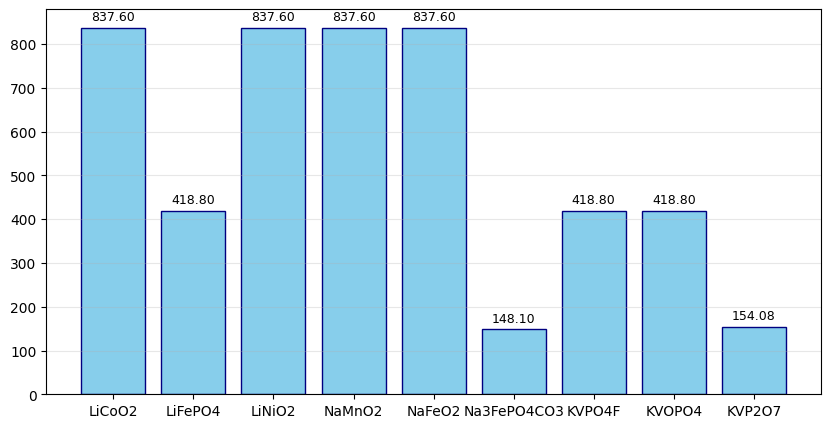

In [3]:
from Battery_Cap import calculate_cap

materials = [
    'LiCoO2',
    'LiFePO4',
    'LiNiO2',
    'NaMnO2',
    'NaFeO2',
    'Na3FePO4CO3',
    'KVPO4F',
    'KVOPO4',
    'KVP2O7'
]


with open('out.txt', 'w') as f:
    for mat in materials:
        f.write(f'{mat} {calculate_cap(mat)}\n')






import matplotlib.pyplot as plt

values = []
with open ('out.txt', 'r') as f:
    for line in f.readlines():
        a = line.split()
        values.append(float(a[1]))

plt.figure(figsize=(10, 5))
bars = plt.bar(materials, values, color='skyblue', edgecolor='navy')

plt.xticks(ha='center')
plt.grid(axis='y', alpha=0.3)

for bar, q in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{q:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()